In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# HR Analysis Case Study
## Основная информация

В этом наборе данных представлены сведения о работниках некоторой компании. Для каждого сотрудника указано:
- id - его идентификатор
- department - отдел
- region - регион
- education - ступень образования
- gender - пол
- recruitment_channel - канал найма
- no_of_trainings - количество пройденных тренингов
- age -  возраст
- previous_year rating - рейтинг сотрудника за прошлый год
- length_of_service - стаж работы
- KPIs_met > 80 % - ключевые показатели эффективности выше 80 % ? 
- awards_won ? - выигрывал ли награды?
- avg_training_score - средний балл на тренингах 
- is_promoted - был ли повышен в должности?

Задача: построить модель, предсказывающую на основе текущих данных, был ли он повышен в должности. 

In [8]:
data = pd.read_csv('train.csv')
data.shape

(54808, 14)

In [9]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [10]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


## Характеристики данных

In [12]:
# Числовые
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [13]:
# категориальные
data.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


## Визуализация данных

In [14]:
sns.set(style = 'white', rc={'figure.figsize':(10, 6)})

## 1. Половозрастной состав компании.

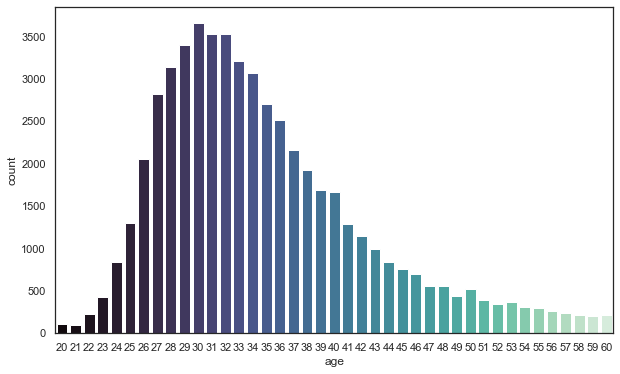

In [15]:
sns.countplot(x='age', data=data, palette ='mako')
pass

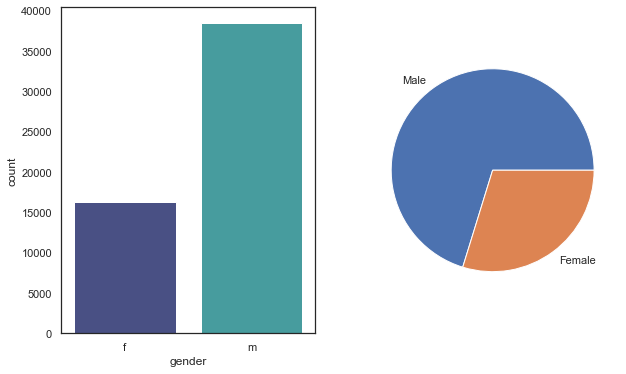

In [16]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='gender', data=data, palette="mako", ax=ax[0])
plt.pie(data['gender'].value_counts(), labels = ['Male', 'Female'])
pass

Сотрудников-мужчин почти в 2.4 раза больше, чем сотрудников-женщин.

## 2. Уровень образования сотрудников

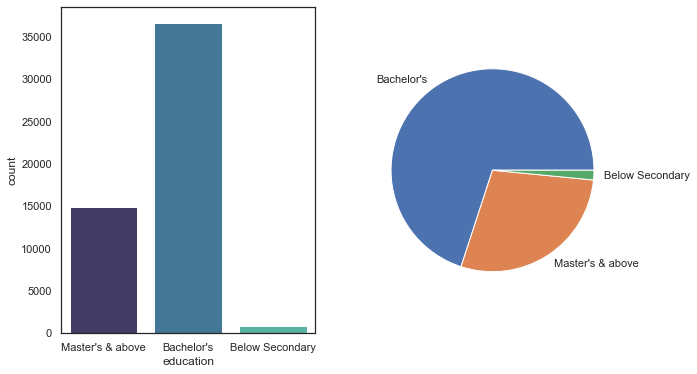

In [17]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='education', data=data,  palette="mako", ax = ax[0])
plt.pie(data['education'].value_counts(), labels = ["Bachelor's", "Master's & above",'Below Secondary'])
pass

## 3. Диаграмма занятости по отраслям

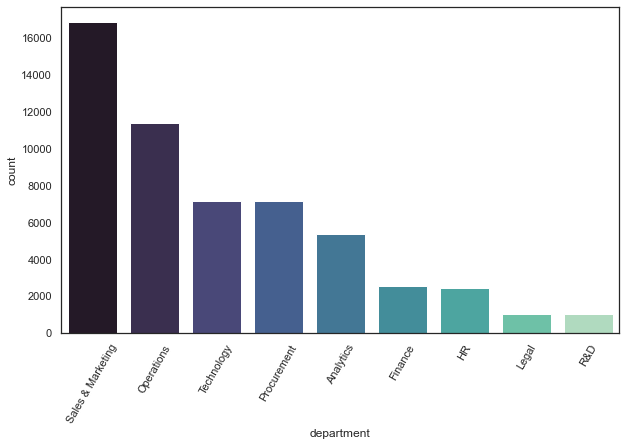

In [18]:
sns.countplot(x='department', order=data['department'].value_counts().index,  data=data, palette = 'mako')
plt.xticks(rotation = 60)
pass

### Распределение возрастов сотрудников по отраслям

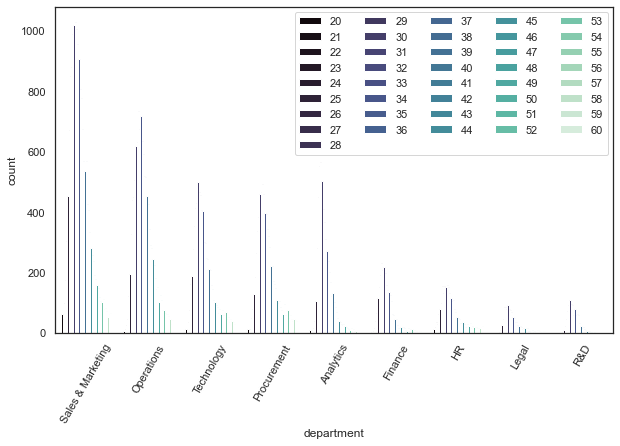

In [19]:
sns.countplot(x='department', order=data['department'].value_counts().index, hue = 'age', palette="mako", data=data)
plt.legend(ncol=5, loc='upper right')
plt.xticks(rotation = 60)
pass

In [20]:
data['age'].mean()

34.80391548679025

медианы и моды возрастов по отделам:

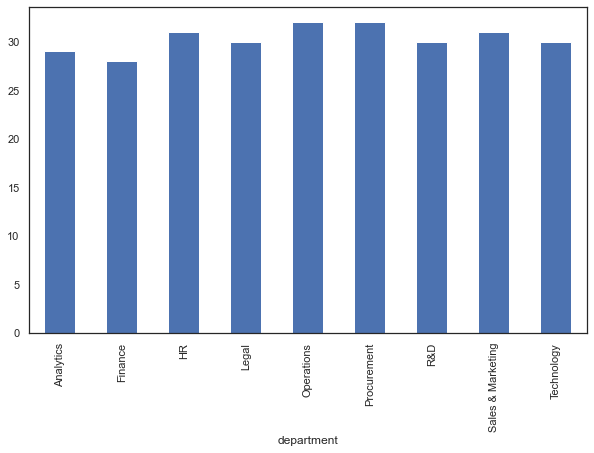

In [21]:
data.groupby('department')['age'].agg(pd.Series.mode).plot.bar()
pass

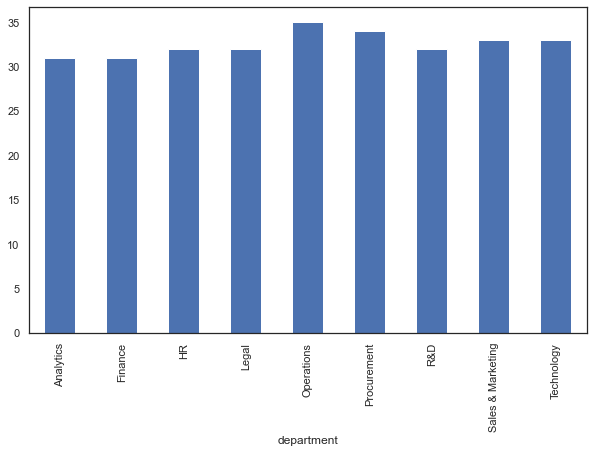

In [22]:
data.groupby('department')['age'].agg(pd.Series.median).plot.bar()
pass

## 4. Диаграммы рассеивания для каждой пары переменных

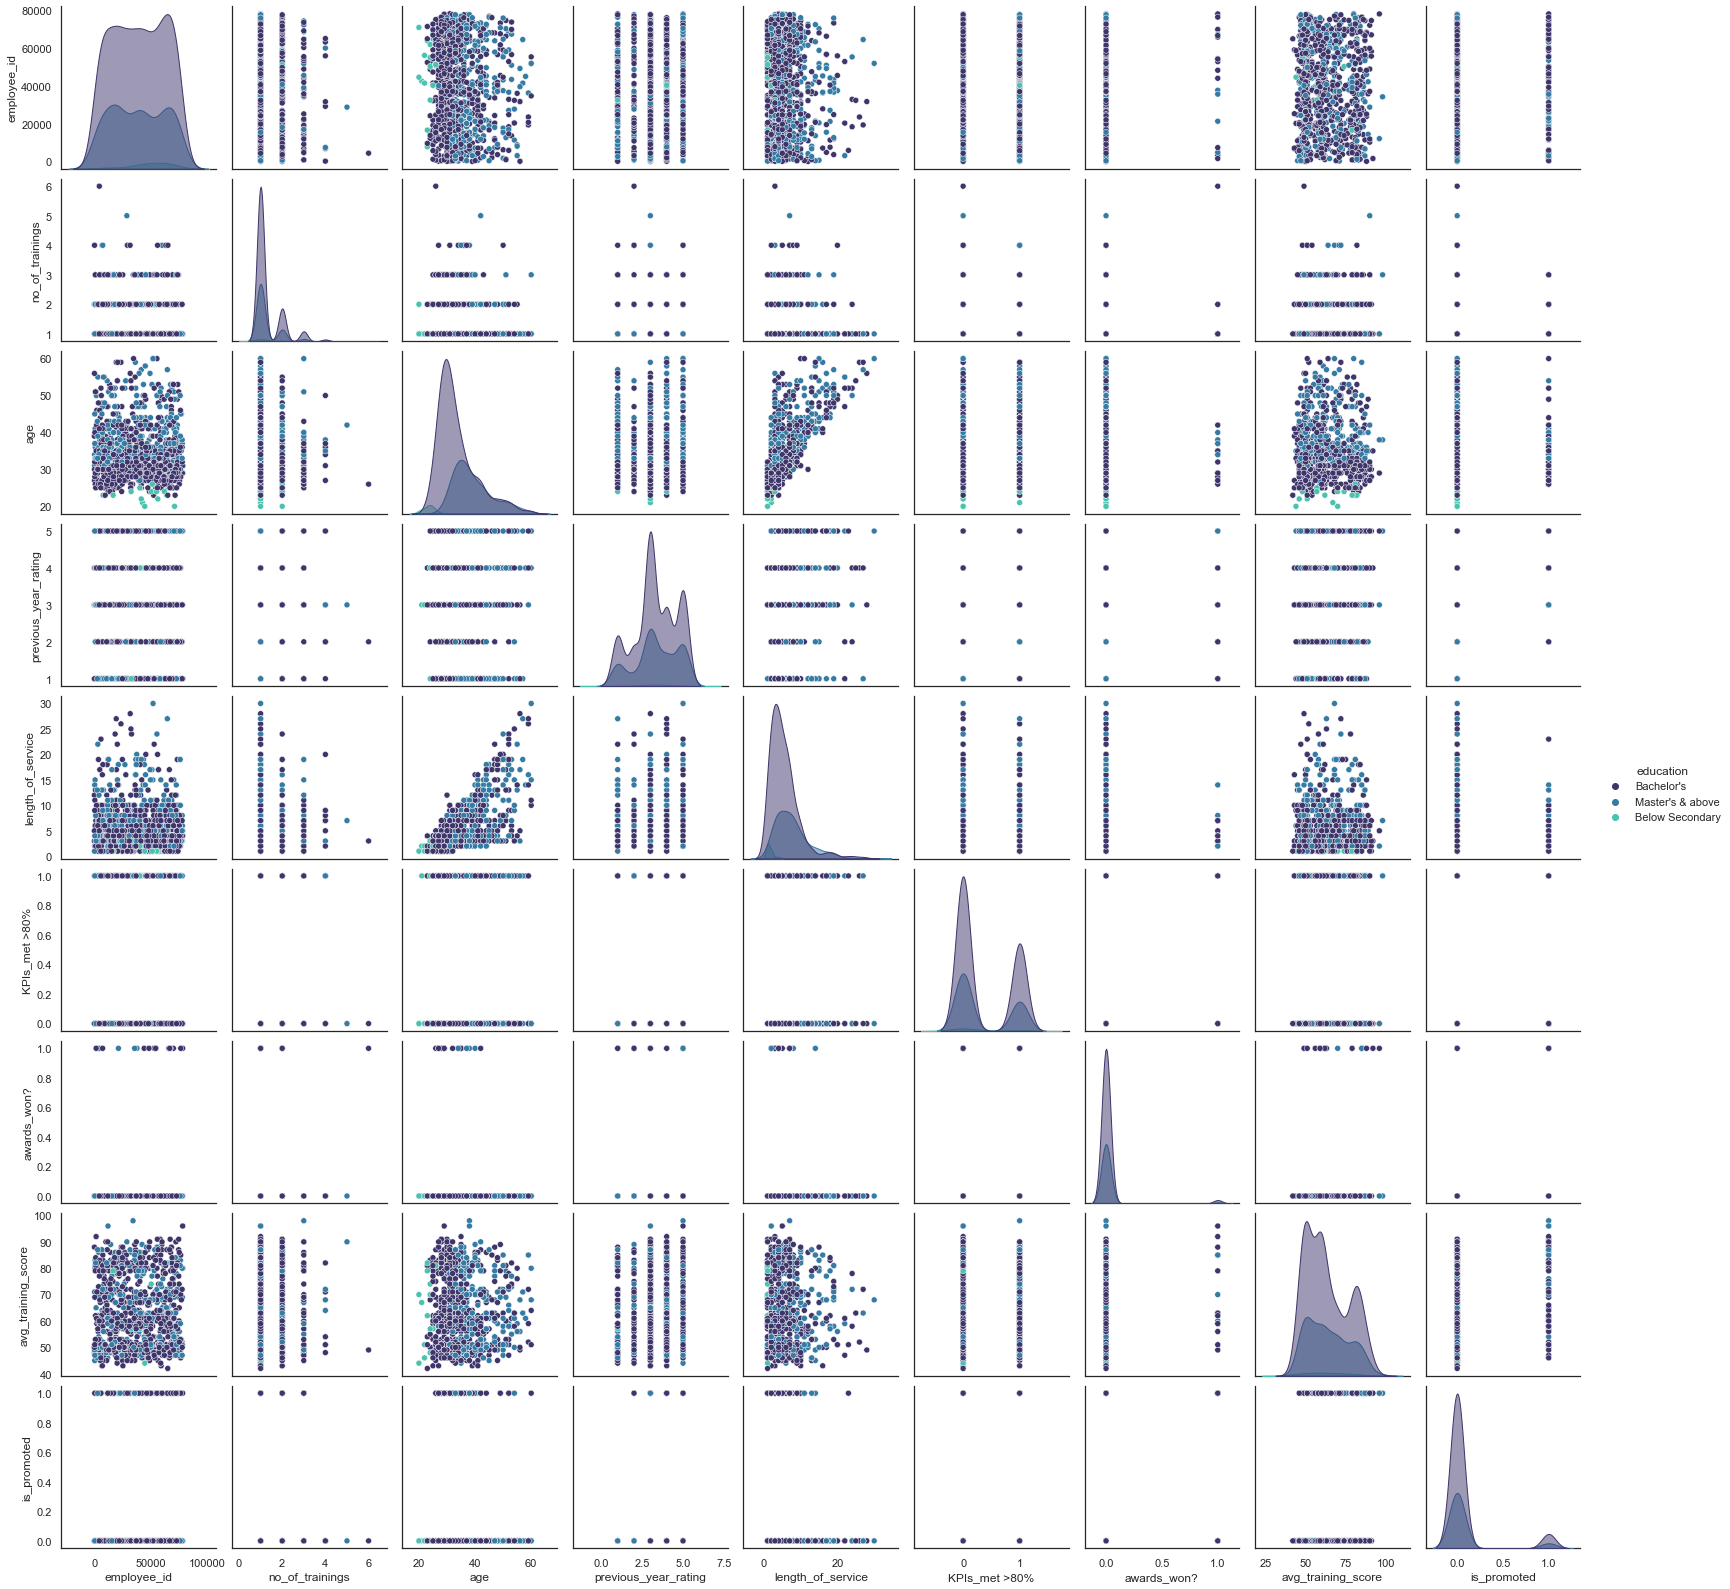

In [23]:
np.random.seed(31)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace = False)
sns.pairplot(data.iloc[random_subset], diag_kind = 'auto', hue='education', diag_kws={'alpha':0.5}, palette = 'mako')
pass

#### Графики распределения числовых признаков

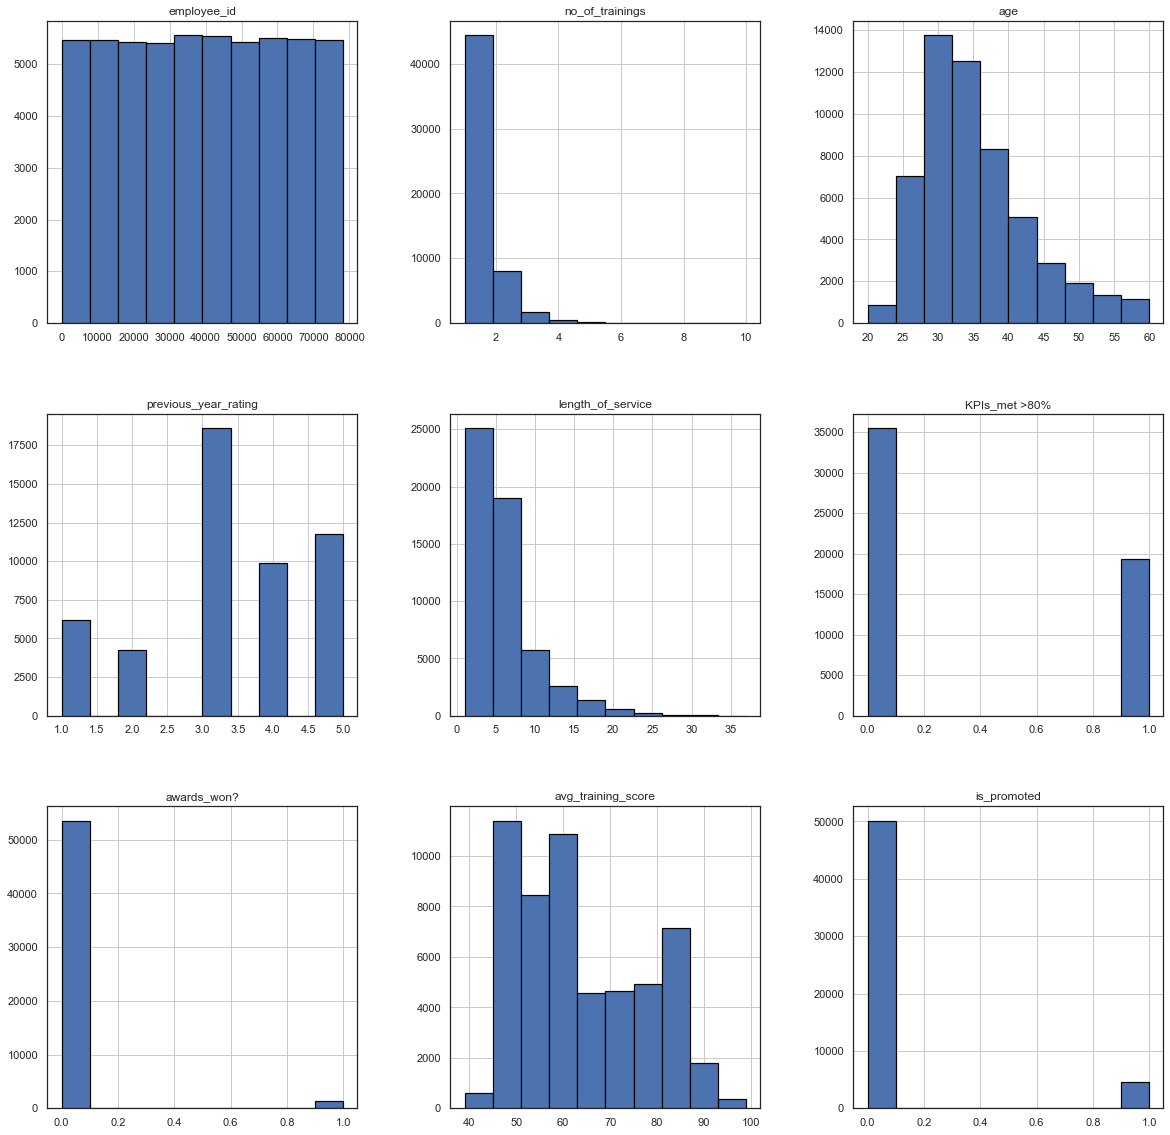

In [24]:
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

Из этих графиков видно, что:
- Примерно две трети сотрудников имеют ключевые показтели производительности (KPI) ниже  80%
- Абсолютное большинство сотрудников никогда не выигрывали награды
- Стаж работы в компании у большинства (48922) до 10 лет, что достаточно легко объясняется возрастом среднего работника (30 лет)
- Всего 646 сотрудников имеют стаж больше 19 лет
- Большинство сотрудников ( > 40000) прошли только один тренинг.

Рассмотрим следующие гистрограммы и сделаем предположения о распределениях:

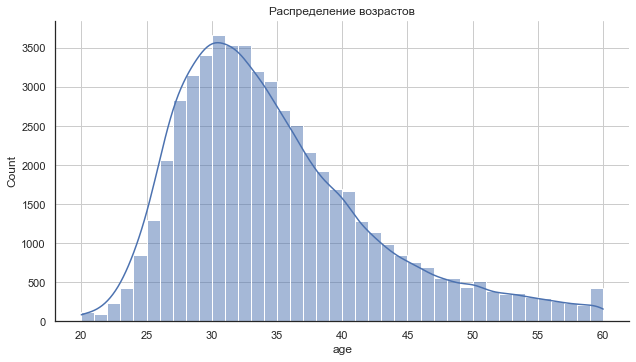

In [25]:
sns.displot(data['age'], bins=40, kde = True, aspect = 1.8)
plt.grid()
plt.title('Распределение возрастов')
pass

Распределение возрастов визуально похоже на гамма распределение.

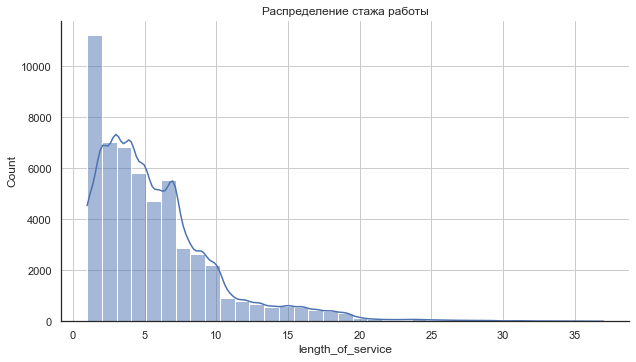

In [26]:
sns.displot(data['length_of_service'], bins=35, kde = True, aspect = 1.8)
plt.grid()
plt.title('Распределение стажа работы')
pass

Распределение для количества сотрудников с разным стажем работы напоминает экспоненциальное распределение.

## 5. Корреляционная матрица

C:\Users\Asya\AppData\Local\Temp\ipykernel_11484\1515084721.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), square=True, cmap='coolwarm')


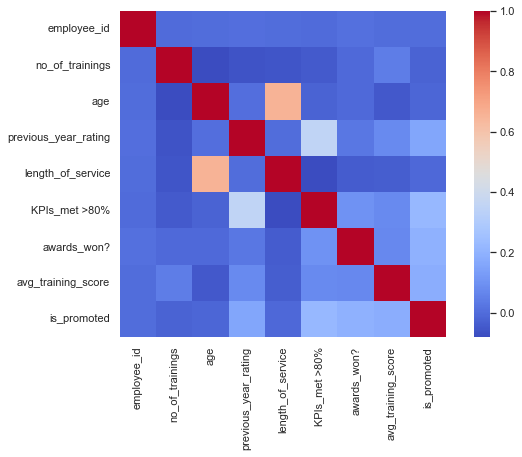

In [27]:
sns.heatmap(data.corr(), square=True, cmap='coolwarm')
pass

Ожидаемо присутствует корреляция между стажем работы и возрастом. Между остальными признаками явной корреляции не наблюдается.

# Обработка данных
## 1. Заполнение пропущенных значений

In [28]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [29]:
data.fillna(data.median(axis = 0), axis = 0, inplace = True)

C:\Users\Asya\AppData\Local\Temp\ipykernel_11484\4152870437.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(axis = 0), axis = 0, inplace = True)


In [30]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [31]:
data['education'].fillna(data['education'].mode().iloc[0], inplace = True)

In [32]:
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## 2. Обработка категориальных признаков

In [33]:
data.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,39078,38496,30446


### gender

In [34]:
data['gender'] = pd.factorize(data['gender'])[0]
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0


### department

In [35]:
dummies_departments = pd.get_dummies(data['department'])
dummies_departments.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1


In [36]:
data = pd.concat((data, dummies_departments), axis=1)
data = data.drop(['department'],  axis=1)

In [37]:
data.head()

,employee_id,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,...,is_promoted,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,65438,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,...,0,0,0,0,0,0,0,0,1,0
1,65141,region_22,Bachelor's,1,other,1,30,5.0,4,0,...,0,0,0,0,0,1,0,0,0,0
2,7513,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,...,0,0,0,0,0,0,0,0,1,0
3,2542,region_23,Bachelor's,1,other,2,39,1.0,10,0,...,0,0,0,0,0,0,0,0,1,0
4,48945,region_26,Bachelor's,1,other,1,45,3.0,2,0,...,0,0,0,0,0,0,0,0,0,1


### region

In [38]:
dummies_region = pd.get_dummies(data['region'])
data = pd.concat((data, dummies_region), axis=1)
data = data.drop(['region'],  axis=1)
data.head()

,employee_id,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,65438,Master's & above,0,sourcing,1,35,5.0,8,1,0,...,0,0,0,0,0,0,0,1,0,0
1,65141,Bachelor's,1,other,1,30,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7513,Bachelor's,1,sourcing,1,34,3.0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2542,Bachelor's,1,other,2,39,1.0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,48945,Bachelor's,1,other,1,45,3.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


### education

In [39]:
dummies_education = pd.get_dummies(data['education'])
data = pd.concat((data, dummies_education), axis=1)
data = data.drop(['education'],  axis=1)
data.head()

,employee_id,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,region_34,region_4,region_5,region_6,region_7,region_8,region_9,Bachelor's,Below Secondary,Master's & above
0,65438,0,sourcing,1,35,5.0,8,1,0,49,...,0,0,0,0,1,0,0,0,0,1
1,65141,1,other,1,30,5.0,4,0,0,60,...,0,0,0,0,0,0,0,1,0,0
2,7513,1,sourcing,1,34,3.0,7,0,0,50,...,0,0,0,0,0,0,0,1,0,0
3,2542,1,other,2,39,1.0,10,0,0,50,...,0,0,0,0,0,0,0,1,0,0
4,48945,1,other,1,45,3.0,2,0,0,73,...,0,0,0,0,0,0,0,1,0,0


### recruitment_channel	

In [40]:
dummies_recruitment_channel = pd.get_dummies(data['recruitment_channel'])
data = pd.concat((data, dummies_recruitment_channel), axis=1)
data = data.drop(['recruitment_channel'],  axis=1)
data.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_6,region_7,region_8,region_9,Bachelor's,Below Secondary,Master's & above,other,referred,sourcing
0,65438,0,1,35,5.0,8,1,0,49,0,...,0,1,0,0,0,0,1,0,0,1
1,65141,1,1,30,5.0,4,0,0,60,0,...,0,0,0,0,1,0,0,1,0,0
2,7513,1,1,34,3.0,7,0,0,50,0,...,0,0,0,0,1,0,0,0,0,1
3,2542,1,2,39,1.0,10,0,0,50,0,...,0,0,0,0,1,0,0,1,0,0
4,48945,1,1,45,3.0,2,0,0,73,0,...,0,0,0,0,1,0,0,1,0,0


## 3. Подготовка тестовой и тренировочной выборок

Обработку всех категориальных признаков можно сделать в одну строчку:

In [41]:
data = pd.read_csv('train.csv')
data.fillna(data.median(axis = 0), axis = 0, inplace = True)
data['education'].fillna(data['education'].mode().iloc[0], inplace = True)
X = pd.get_dummies(data)
X.columns

C:\Users\Asya\AppData\Local\Temp\ipykernel_11484\1664148038.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(axis = 0), axis = 0, inplace = True)


Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region

## 4. Разделение выборки на x и y

Выделяем столбец is_promoted - то что будем предсказывать

In [42]:
Y = X[['is_promoted']]
X = X.drop(['is_promoted'], axis=1)
print("x:", X.shape)
print("y:", Y.shape)

x: (54808, 59)
y: (54808, 1)


## 5.  Нормализация количественных признаков

In [43]:
X=(X-X.mean())/X.std()

## 6. Отбор признаков
Признак employee id не несет никакой содержательной информации для решаемой задачи, поэтому его можно исключить из тренировочной и тестовой выборок, предварительно сохранив в отдельную переменную

In [44]:
emp_id = X['employee_id']
X = X.drop(['employee_id'], axis = 1)
X.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

## 7. Разделение выборки на тренировочную и тестовую

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 17)
print("x_train: ", x_train.shape)
print("x_test ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (43846, 58)
x_test  (10962, 58)
y_train:  (43846, 1)
y_test:  (10962, 1)


In [46]:
x_no_reg_train = x_train.copy()
x_no_reg_test = x_test.copy()
for i in range(1, 35):
    x_no_reg_train = x_no_reg_train.drop([f'region_region_{i}'], axis = 1)
    x_no_reg_test = x_no_reg_test.drop([f'region_region_{i}'], axis = 1)

# Построение предсказательных моделей

## 1. k ближайших соседей

In [47]:
acc = pd.DataFrame({'size':[],'train_accuracy':[],'test_accuracy':[]})
for i in range(1,13,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    acc  = acc.append({'size':i,'train_accuracy':knn.score(x_train, y_train),
                                 'test_accuracy':knn.score(x_test, y_test)},ignore_index=True)
print(acc)

C:\Users\Asya\AppData\Local\Temp\ipykernel_11484\4243957113.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc  = acc.append({'size':i,'train_accuracy':knn.score(x_train, y_train),
C:\Users\Asya\AppData\Local\Temp\ipykernel_11484\4243957113.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc  = acc.append({'size':i,'train_accuracy':knn.score(x_train, y_train),
C:\Users\Asya\AppData\Local\Temp\ipykernel_11484\4243957113.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc  = acc.append({'size':i,'train_accuracy':knn.score(x_train, y_train),
C:\Users\Asya\AppData\Local\Temp\ipykernel_11484\4243957113.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

   size  train_accuracy  test_accuracy
0   1.0        0.999795       0.884693
1   3.0        0.937144       0.905127
2   5.0        0.927040       0.910874
3   7.0        0.923528       0.912972
4   9.0        0.921338       0.914340
5  11.0        0.920061       0.914614


C:\Users\Asya\AppData\Local\Temp\ipykernel_11484\4243957113.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc  = acc.append({'size':i,'train_accuracy':knn.score(x_train, y_train),


[[0.9952048  0.0047952 ]
 [0.93277311 0.06722689]]


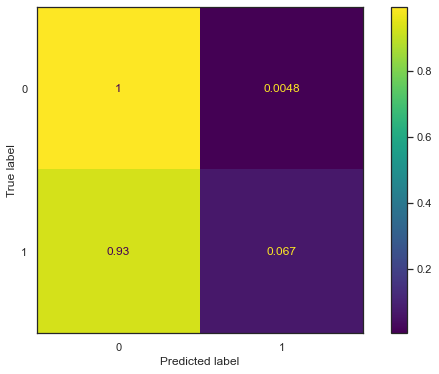

In [49]:
# k = 11
ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, normalize='true')
print(confusion_matrix(y_test,knn.predict(x_test), normalize='true'))
pass

Общая точность достаточно высокая, однако это достигается за счет почти 100% предсказания не повышений. Повышения же предсказываются правильно лишь в 6% случаев.

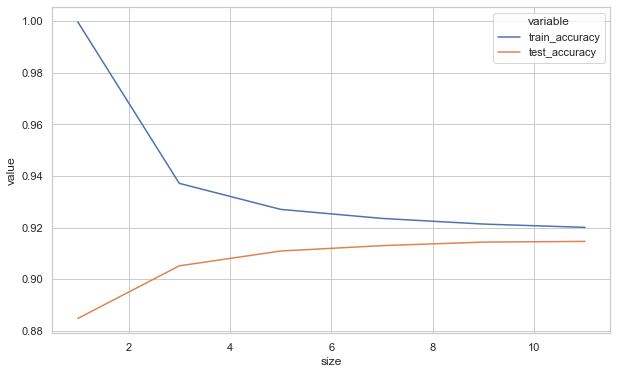

In [50]:
sns.set_style("whitegrid")
sns.lineplot(x = 'size', y = 'value', hue = 'variable', data=pd.melt(acc, ['size']))
pass

## 2. Случайный лес

In [51]:
rfc = RandomForestClassifier() # class_weight='balanced'
rfc.fit(x_train, y_train.values.ravel())
print("Train Accuracy :", rfc.score(x_train, y_train))
print("Test Accuracy :", rfc.score(x_test, y_test))

Train Accuracy : 0.9997947361218811
Test Accuracy : 0.9325852946542602


[[0.99430569 0.00569431]
 [0.71638655 0.28361345]]


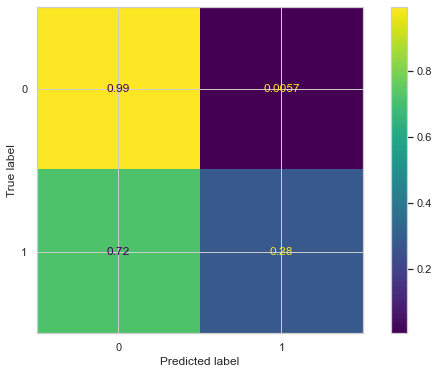

In [52]:
ConfusionMatrixDisplay.from_estimator(rfc, x_test, y_test, normalize='true')
print(confusion_matrix(y_test, rfc.predict(x_test),normalize='true'))
pass

Случайный лес дает точность лучше, чем kNN с числом соседей от 1 до 11. При сохранении почти 100% правильности предсказания не повышения, точность предсказания повышения значительно повысилась с 6% до 28%

## 3. SVM

In [53]:
# default rbf kernel - Radial basis function kernel
clf = svm.SVC() # class_weight='balanced'
clf.fit(x_train, y_train.values.ravel())
print("Train Accuracy :", clf.score(x_train, y_train))
print("Test Accuracy :", clf.score(x_test, y_test))

Train Accuracy : 0.9298909820736213
Test Accuracy : 0.9258347016967706


[[9.99100899e-01 8.99100899e-04]
 [8.44537815e-01 1.55462185e-01]]


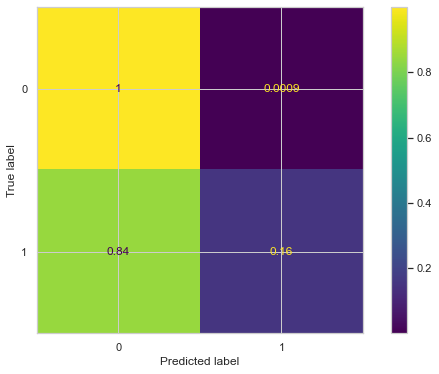

In [54]:
ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, normalize='true')
print(confusion_matrix(y_test,clf.predict(x_test),normalize='true'))
pass

SVM классификатор показал среднюю точность, лучше KNN, но хуже, чем random forest. При этом точнее стало предсказываться не повышение.

# Выводы

- Лучшую точность показал классификатор random forest. 
- В данной задаче необходимо найти некоторую "золотую середину", при которой будут одновременно минимальными шансы предсказать повышение сотрудника, который не должен быть повышен(таких большинство, а должностей для повышения ограниченнное количество) и максимальными предсказать правильное повышение, чтобы был выбран подходящий человек.
- Возможно, для лучшего результата необходимо провести балансировку датасета.

### kNN
Классификатор kNN работает долго на имеющейся конфигурации ПК и датасете размером в несколько десятков тысяч записей.

Точность на обучающей выборке для 1 соседа самая высокая - при вычислении одного ближайшего соседа на той же самой выборке, на которой проходило обучение, классификатор выберет этот же самый элемент, то есть в теории на уникальных данных точность должна составлять 100 %. Точность 99.97 % на обучающей выборке говорит о том, что есть одинаковые данные, принадлежащие разным классам. На тестовой самую высокую точность показал алгоритм, который классифицировал по 9 соседям.
  
### Случайный лес
Классификатор случайный лес дал на тренировочной выборке выше, чем у всех протестированных версий алгоритма kNN. При этом значительно возросла точность предсказания повышения, что существенно для решаемой задачи.

### SVM
SVM классификатор показал среднюю точность, лучше KNN, но хуже, чем random forest.